In [3]:
from typing import List
import copy
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 
from sahi import slicing
from sahi.slicing import slice_image

slicing.logger.setLevel(slicing.logging.INFO)

def visualize_slice_rect(image_path, 
                         slice_size: List = [256, 256],
                         overlap_ratio: float = 0.2,
                         single_row: bool = False,
                         verbose: bool = True):
    
    res = slice_image(image_path, 
                  slice_width=slice_size[0],
                  slice_height=slice_size[1],
                  overlap_height_ratio=overlap_ratio,
                  overlap_width_ratio=overlap_ratio,
                  verbose=verbose)

    # if slice_size is None:
    #   slice_size = list(res.sliced_image_list[0].image.shape[:2])

    image = cv2.imread(image_path)
    image = copy.deepcopy(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for start_pixel in res.starting_pixels:
        # print(start_pixel, [s1+s2 for s1, s2 in zip(start_pixel,slice_size)])
        cv2.rectangle(image,
                      start_pixel,
                      [s1+s2 for s1, s2 in zip(start_pixel,slice_size)],
                      color=(255, 0, 0),
                      thickness=2)

    plt.figure(figsize=(16,16))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    return image 

10/04/2022 08:24:32 - INFO - sahi.slicing -   image.shape: (1068, 580)
10/04/2022 08:24:32 - INFO - sahi.slicing -   Num slices: 5 slice_height: 256 slice_width: 256


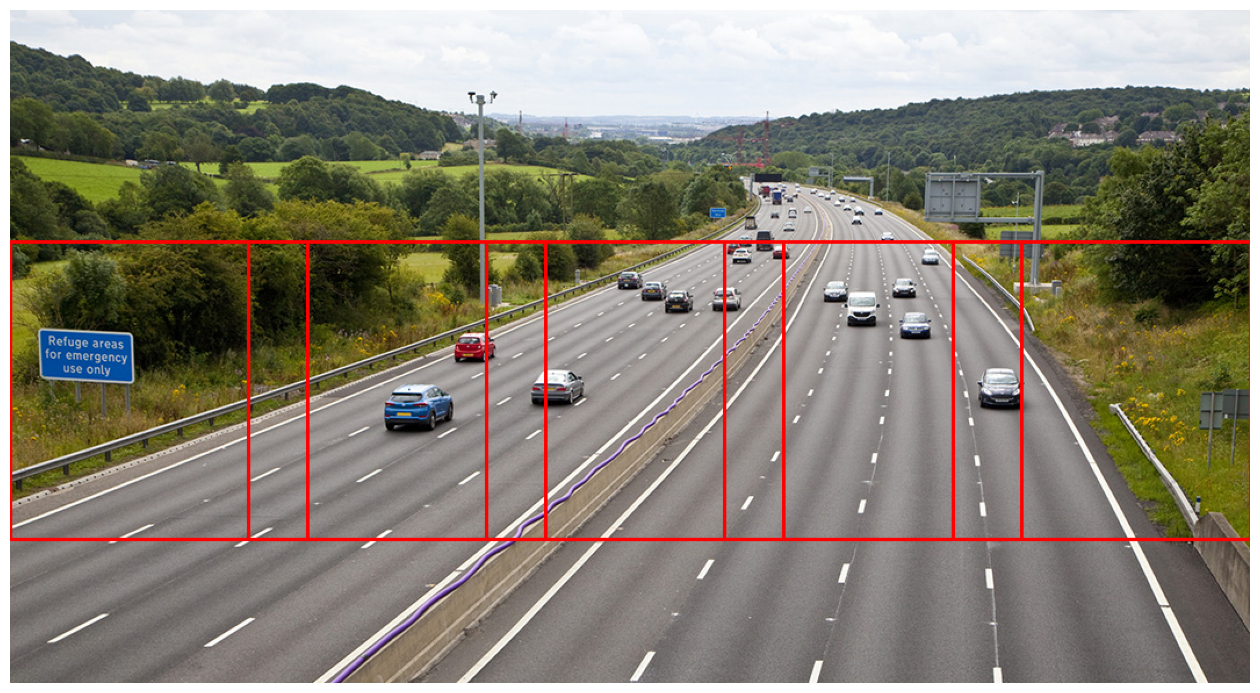

In [4]:
image = visualize_slice_rect("demo_data/small-vehicles1.jpeg")